In [221]:
# load data from csv file and save data into separate lists
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics.cluster import normalized_mutual_info_score
from scipy.fftpack import fft, ifft
from sklearn.decomposition import PCA
import warnings
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import pickle

In [160]:
# when read the data from CSV, the time stamp and associated GMC value should be reversed
def read_raw_data():
    x_1 =[]
    x_2 =[]

    for i in range (5):
        x_1=[]
        x_2=[]
        with open(r'.\MealNoMealData\mealData'+str(i+1)+'.csv','rt')as f:
            data = csv.reader(f)
            for row in data:
                x_1.append(row)
        with open(r'.\MealNoMealData\nomeal'+str(i+1)+'.csv','rt')as ff:
            data = csv.reader(ff)
            for row in data:
                x_2.append(row)
        if i==0:
            x1 = x_1
            x2 = x_2
        elif i!=0:
            x1 = x1+x_1
            x2 = x2+x_2
    return x1,x2

# this func is used to remove the data which contains 'NaN' and only use the first 30 data
def smooth_data(y):
    idx = []
    size_y = len(y)
    for i in range (size_y):
        y[i] = y[i][:30]
        y[i] = y[i][::-1]
        if (len(y[i])!= 30):
            idx.append(i)
        elif 'NaN' in y[i]:
            idx.append(i)      
    for j in range (len(idx),0,-1):
        del y[idx[j-1]]
    return y

In [206]:
x1,x2 = read_raw_data()
print('Number of rows from meal data:',len(x1))
print('Number of rows from no meal data:',len(x2))

x1 = smooth_data(x1)
print("Number of rows from the processed meal data: ",len(x1) )
x2 = smooth_data(x2)
print("Number of rows from the processed no meal data: ",len(x2))

Number of rows from meal data: 255
Number of rows from no meal data: 255
Number of rows from the processed meal data:  216
Number of rows from the processed no meal data:  219


30
[71 71 72 73 73 74 76 80 83 86 87 86 84 85 86 85 85 86 87 88 90 94 96 96
 94 91 89 89 91 93]


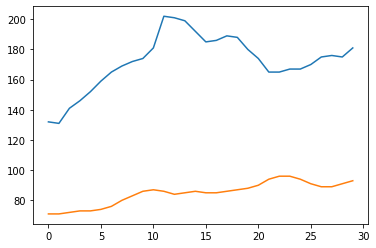

In [162]:
# # plot and print the preprocessed data by using one example
# print(len(x1[1]))
# array_x = np.asarray(x1[100],dtype=int)
# array_y = np.asarray(x2[2],dtype=int)
# print(array_y)
# xx = np.arange(30)

# plt.figure(1)
# plt.plot(xx,array_x)
# plt.plot(xx,array_y)
# plt.show()

In [254]:
# function for calculating the avg of changing velocity with window size 5, result in 6 features
def avg_vel(y):
    average = sum(y)/len(y)
    vel_y = []
    avg_vel = []
    window_size = 5
    for i in range (len(y)-1):
        vel = y[i+1]-y[i]
        vel_y.append(vel)
    np.asarray(vel_y)
#     xx = np.arange(29)
#     plt.plot(xx,vel_y)
#     plt.grid(True)
#     plt.show()
    for i in range (int(len(y)/window_size)):
        if i != (int((len(y)/window_size)-1)):
            avg = np.average(vel_y[(i*6):(i*6)+6])
        avg_vel.append(avg)
    avg_vel.append(average)
    array_vel = np.asarray(avg_vel)
#     array_vel = normalize(array_vel[:,np.newaxis], axis=0).ravel()
#     print('This is the avg_vel feature: ',array_vel)
    return array_vel


def FFT_feature(y):
    yf = 2.0/30 * np.abs(fft(y))
#     xf = np.linspace(0.0, 1.0, 15)
    yf = np.delete(yf,0)
    yf = np.unique(yf)
    xx = np.arange(15)
#     plt.plot(xx,yf[::-1])
#     plt.grid(True)
#     plt.show()
    max_yf = np.partition(yf,-6)[-6:]
    max_yf = np.asarray(max_yf)
    final_yf = normalize(max_yf[:,np.newaxis], axis=0).ravel()
#     print('This is the FFT feature: ',final_yf)
    return max_yf

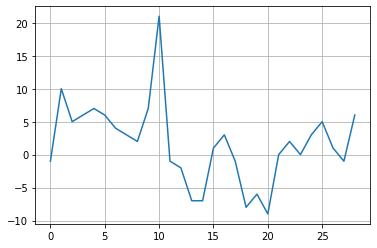

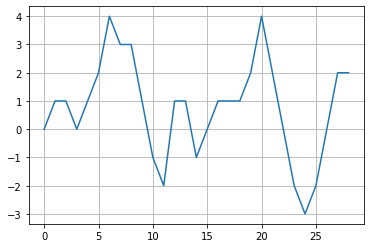

In [31]:
# # this is the result of selected feature
# cc = avg_vel(array_x)
# bb = avg_vel(array_y)

In [255]:
# extract feature and save it into feature metricx
for i in range(len(x1)):
    yy = np.asarray(x1[i],dtype=np.float32)
    f1 = avg_vel(yy[:len(yy)-1])
    f2 = FFT_feature(yy)
    f12 = np.concatenate((f1, f2), axis=None)
    f1 = f12
#     f1 = FFT_feature(yy)
#     f1 = avg_vel(yy)
    if i == 0:
        feature_m1 = f1
    else:
        feature_m1 = np.vstack((feature_m1,f1))

In [256]:
print(feature_m1)

[[  8.5          5.83333349  -4.5        ...   3.67491221   6.08407831
   40.61717224]
 [  3.33333325   6.33333349  -6.5        ...  10.80150127  10.82747173
   54.30354691]
 [ -1.33333337   5.33333349  15.16666698 ...  11.94858265  18.2335968
   73.97637939]
 ...
 [ -4.          -3.5        -11.33333302 ...  22.89179611  35.60248947
   80.97013855]
 [  0.16666667  12.16666698  11.         ...  20.84512901  35.48259354
   99.12181854]
 [  2.16666675   0.83333331   0.33333334 ...  10.00497818  17.09724808
   18.66364479]]


In [257]:
for i in range(len(x2)):
    yy = np.asarray(x2[i],dtype=np.float32)
    f1 = avg_vel(yy[:len(yy)-1])
    f2 = FFT_feature(yy)
    f12 = np.concatenate((f1, f2), axis=None)
    f1 = f12
#     f1 = FFT_feature(yy)
#     f1 = avg_vel(yy)
    if i == 0:
        feature_m2 = f1
    else:
        feature_m2 = np.vstack((feature_m2,f1))

In [258]:
print(feature_m2)

[[ 0.5         5.66666651  4.83333349 ... 10.56836891 21.81439209
  49.45605469]
 [ 0.          1.          0.16666667 ...  1.94071567  6.15018034
   6.40827656]
 [ 0.83333331  1.33333337  0.5        ...  2.13333344  5.53310061
   8.01251411]
 ...
 [ 5.83333349  4.66666651  0.66666669 ... 18.36194611 22.59462547
  34.16338348]
 [11.16666698  8.16666698  0.5        ... 12.40840244 32.13361359
  47.38627243]
 [ 1.66666663  5.66666651  2.         ...  4.04472685  8.12174892
  33.41304779]]


In [259]:
# merge two feature matrix together and create label set
label_1 = np.ones(len(x1))
label_2 = np.zeros(len(x2))
feature_m = np.vstack((feature_m1,feature_m2))
label = np.hstack((label_1,label_2))
print(label.shape)
print(feature_m.shape)

(435,)
(435, 12)


In [ ]:
# new_array = np.concatenate((feature_m,label), axis=1)
new_array = np.column_stack([feature_m,label])
# np.concatenate((first, second), axis=1)
print(new_array.shape)
np.random.shuffle(new_array)
for i in range (len(new_array)):
    if i == 0:
        feature_m = new_array[i][:12]
        label = new_array[i][12]
    else:
        feature_m = np.vstack((feature_m,new_array[i][:12]))
        label = np.hstack((label, new_array[i][12]))
# print(feature_m.shape)
# print(label)

In [217]:
# X_train, X_test, y_train, y_test = train_test_split(feature_m, label, test_size=0.1, random_state=0)
# X_train.shape, y_train.shape
# X_test.shape, y_test.shape
X_train = feature_m
y_train = label
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
# clf.score(X_test, y_test)
pickle.dump(clf, open('model.pickle', 'wb'))

In [ ]:
kf = KFold(n_splits=5)
kf.get_n_splits(feature_m)
print("This is the K-fold cross validation result:")
for train_index, test_index in kf.split(feature_m):
    X_train, X_test = feature_m[train_index], feature_m[test_index]
    y_train, y_test = label[train_index], label[test_index]
    clf = svm.SVC(kernel='linear', C=10).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))